<a href="https://colab.research.google.com/github/nicolly-sak/HD-emg-analysis/blob/main/PDPD3_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle 
from matplotlib import pylab
from google.colab import widgets
import scipy.signal
!pip install hickle
import hickle

!pip install --upgrade numpy
import h5py
!pip install --upgrade tbb

In [ ]:
df_dict = hickle.load('/content/drive/MyDrive/PDPD/Dicionário/df_dict.hkl')
dados01 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados01.h5", "r+")
dados02 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados02.h5", "r+")
dados03 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados03.h5", "r+")
dados04 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados04.h5", "r+")
dados05 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados05.h5", "r+")
dados06 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados06.h5", "r+")
dados07 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados07.h5", "r+")
dados08 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados08.h5", "r+")
dados09 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados09.h5", "r+")
dados10 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados10.h5", "r+")
dados11 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados11.h5", "r+")
dados12 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados12.h5", "r+")

In [ ]:
#função para escolher cada caracteristica desejada

def selecionar(df, subjx = "todos", sessionx= "todos", speedx= "todos", movementx= "todos") :
  print("subj: "+ subjx)
  queryexpression= " "
  if subjx != "todos" :
    queryexpression= queryexpression + 'subj == "'+ subjx +'" &' 
  if sessionx != "todos" :
    queryexpression= queryexpression + ' session =='+ str(sessionx) + '&'
  if speedx != "todos" :
    queryexpression= queryexpression + ' speed =="'+ speedx + '" &'
  elif movementx == 'todos' :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]
  if movementx != "todos" :
    queryexpression= queryexpression +  ' movement =="'+ movementx +'"'   
  else :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]

  if queryexpression == " ":
    w= df   
  else:
    w= df.query(queryexpression)
  
  print(queryexpression)
  
  return w

In [ ]:
#teste
selecionar(df_dict[1], movementx= "point")

subj: todos
  movement =="point"


,subj,session,speed,movement,caminho,Age,Gender,Dominant Hand
13,subj01,2,fast,point,-,30.0,F,L
16,subj01,2,slow,point,-,30.0,F,L
42,subj01,3,slow,point,-,30.0,F,L
82,subj01,1,slow,point,-,30.0,F,L
84,subj01,1,fast,point,-,30.0,F,L
122,subj01,3,slow,point,-,30.0,F,L
126,subj01,3,fast,point,-,30.0,F,L
144,subj01,1,fast,point,-,30.0,F,L
147,subj01,2,fast,point,-,30.0,F,L
150,subj01,2,slow,point,-,30.0,F,L


In [ ]:
#funçao para plotar os grafico dos itens selecionados

def plotar_grafico_emg(emgy, query, dados) :
  tb = widgets.TabBar([str(i) for i in range(len(query)) ])
  for j in range(len(query)):
    i = query.index[j]
    emg= emgy
    emg= emg+" "
    emgx=np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    
    w=dados['/'+str(i) +'/emg'][emgx].shape[0]
    
    t= 1/2048
    x= np.arange(0,w,1)*(t)
    y=dados['/'+str(i) +'/emg'][emgx]

    with tb.output_to(j, select=(j == 0)):
      pylab.plot(x, y)
      pylab.show()

subj: todos
  movement =="point"
17
subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

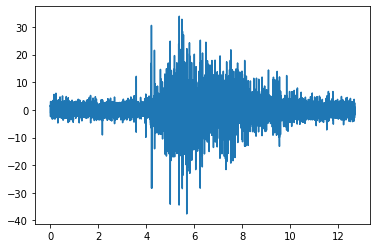

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

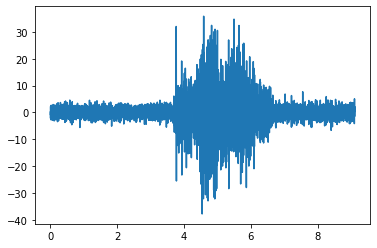

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

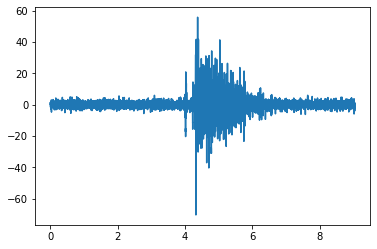

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

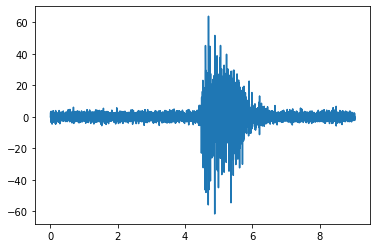

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

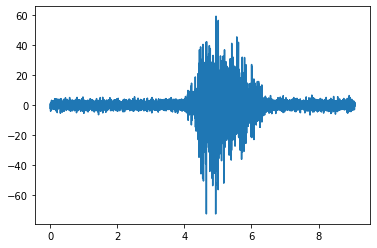

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

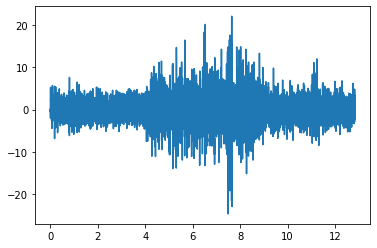

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

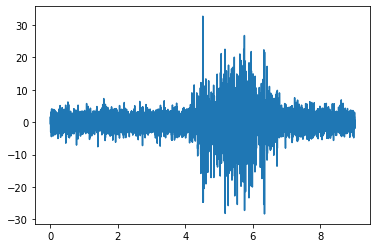

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

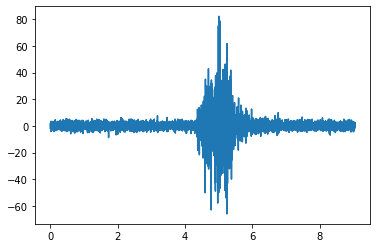

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

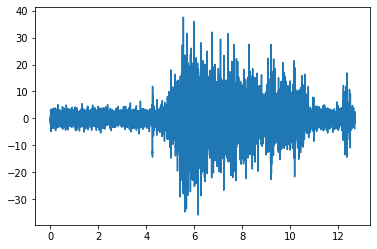

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

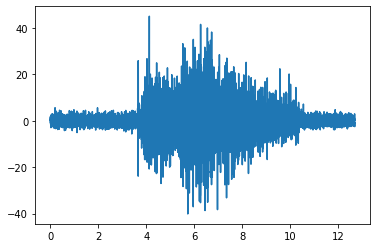

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

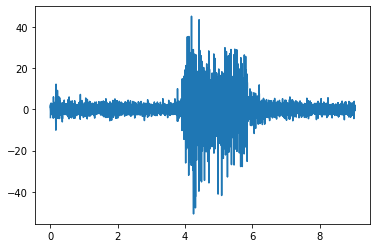

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

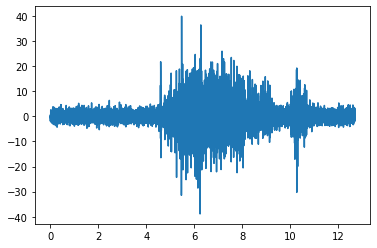

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

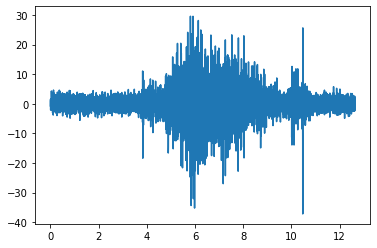

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

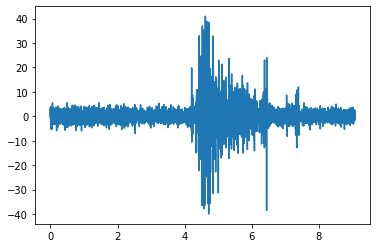

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

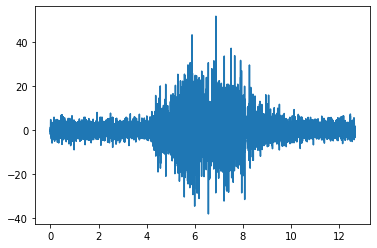

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

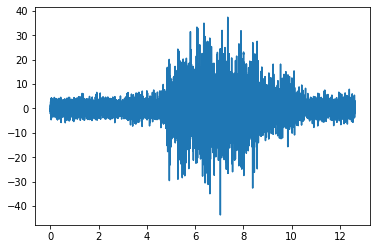

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

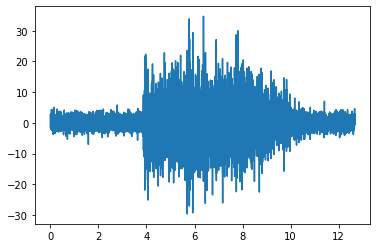

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

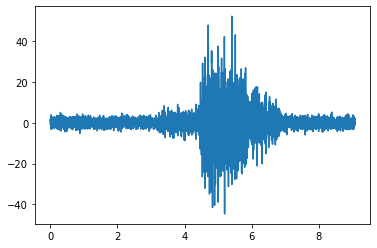

<IPython.core.display.Javascript object>

In [ ]:
#teste
#ver quantas tabelas devem ser plotadas
quantidade= len(selecionar(df_dict[1], movementx= "point"))
print(quantidade)

#plotar os graficos
plotar_grafico_emg("MA1", selecionar(df_dict[11], movementx= "point"), dados11)

In [ ]:
colunas= ['subj','session','speed','movement', 'Age', 'Gender', 'Dominant Hand', 'emg', 'Desvio Padrao', 'Variancia', 'Amplitude']
tabela_estatisticas= pd.DataFrame(columns=colunas)

def estatisticas_dados_emg(emgy, query, dados) :
  print(emgy)
  for j in range(len(query)):
    i = query.index[j]
    emg= emgy
    emg= emg+" "
    emgx= np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    desvio_padrao= dados['/'+str(i) +'/emg'][emgx].std()
    variancia= dados['/'+str(i) +'/emg'][emgx].var()
    amplitude= dados['/'+str(i) +'/emg'][emgx].max() - dados['/'+str(i) +'/emg'][emgx].min()
    print("Desvio padrao: ", desvio_padrao, "Variancia: ", variancia, "Amplitude: ", amplitude)

    tabela_estatisticas.loc[j, 'Desvio Padrao']= desvio_padrao

    tabela_estatisticas.loc[j, 'Variancia']= variancia

    tabela_estatisticas.loc[j, 'Amplitude']= amplitude

    tabela_estatisticas.loc[j, 'emg']= emg   


    if ((dados['/' + str(i) + '/session'][0][0])==1):
      tabela_estatisticas.loc[j,'session']= 1
    elif ((dados['/' + str(i)+'/session'][0][0])==2) :
      tabela_estatisticas.loc[j,'session']= 2    
    else :
      tabela_estatisticas.loc[j,'session']= 3

    if ((dados['/' + str(i) +'/speed'][0])=='slow') :
      tabela_estatisticas.loc[j,'speed']= 'slow'
    else :
      tabela_estatisticas.loc[j,'speed']= 'fast'

    tabela_estatisticas.loc[j, 'subj']= dados['/' + str(i) +'/subject'][0]

    tabela_estatisticas.loc[j, 'movement']= dados['/' + str(i) +'/movement'][0]

   
    tabela_estatisticas.loc[j, 'Age']= query.loc[i, 'Age']

    tabela_estatisticas.loc[j, 'Gender']= query.loc[i, 'Gender']

    tabela_estatisticas.loc[j, 'Dominant Hand']= query.loc[i, 'Dominant Hand']

In [ ]:
#teste
estatisticas_dados_emg("MA1", selecionar(df_dict[1], movementx= "point"), dados01) 

subj: todos
  movement =="point"
MA1
Desvio padrao:  4.373623 Variancia:  19.128578 Amplitude:  66.04529
Desvio padrao:  2.719354 Variancia:  7.394886 Amplitude:  33.469597
Desvio padrao:  3.1900928 Variancia:  10.176692 Amplitude:  41.632816
Desvio padrao:  4.1544895 Variancia:  17.259783 Amplitude:  47.91336
Desvio padrao:  3.469016 Variancia:  12.034072 Amplitude:  45.981655
Desvio padrao:  4.504374 Variancia:  20.289387 Amplitude:  166.94267
Desvio padrao:  4.026336 Variancia:  16.211382 Amplitude:  64.76719
Desvio padrao:  4.54184 Variancia:  20.628311 Amplitude:  88.83047
Desvio padrao:  4.1662683 Variancia:  17.357792 Amplitude:  60.086563
Desvio padrao:  3.2120352 Variancia:  10.31717 Amplitude:  35.018406
Desvio padrao:  5.1460853 Variancia:  26.482191 Amplitude:  116.21968
Desvio padrao:  3.7649596 Variancia:  14.17492 Amplitude:  75.132904
Desvio padrao:  4.4093513 Variancia:  19.442379 Amplitude:  157.9105
Desvio padrao:  2.9636652 Variancia:  8.783312 Amplitude:  65.94913


In [ ]:
#teste
tabela_estatisticas

,subj,session,speed,movement,Age,Gender,Dominant Hand,emg,Desvio Padrao,Variancia,Amplitude
0,subj01,2,fast,point,30,F,L,MA1,4.37362,19.1286,66.0453
1,subj01,2,slow,point,30,F,L,MA1,2.71935,7.39489,33.4696
2,subj01,3,slow,point,30,F,L,MA1,3.19009,10.1767,41.6328
3,subj01,1,slow,point,30,F,L,MA1,4.15449,17.2598,47.9134
4,subj01,1,fast,point,30,F,L,MA1,3.46902,12.0341,45.9817
5,subj01,3,slow,point,30,F,L,MA1,4.50437,20.2894,166.943
6,subj01,3,fast,point,30,F,L,MA1,4.02634,16.2114,64.7672
7,subj01,1,fast,point,30,F,L,MA1,4.54184,20.6283,88.8305
8,subj01,2,fast,point,30,F,L,MA1,4.16627,17.3578,60.0866
9,subj01,2,slow,point,30,F,L,MA1,3.21204,10.3172,35.0184


In [ ]:
def plotar_grafico_emg_sd(emgy, query, dados) :
  emg_sd = dict()
  tb = widgets.TabBar([str(i) for i in range(len(query)) ])
  for j in range(len(query)):
    i = query.index[j]
    emg = emgy
    emg = emg+" "
    emgx=np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    w=dados['/'+str(i) +'/emg'][emgx].shape[0]
    t= 1/2048
    x= np.arange(0,w,1)*(t)
    y=dados['/'+str(i) +'/emg'][emgx]



    emg_sd[j]= pd.DataFrame(np.abs(dados['/'+str(i) +'/emg'][emgx])).rolling(window= 2048, min_periods= 0, center= True).std().fillna(0).values

    with tb.output_to(j, select=(j == 0)):
      
      pylab.plot(x, y)
      pylab.plot(x, emg_sd[j], 'r')
      pylab.show()

  return emg_sd

subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

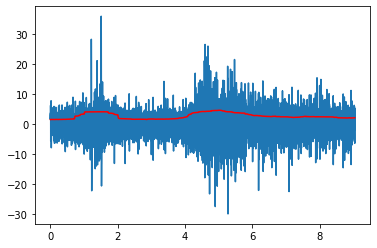

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

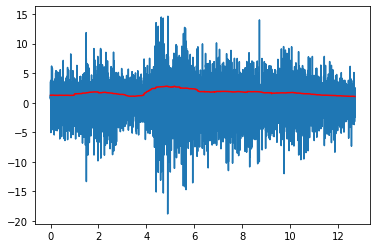

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

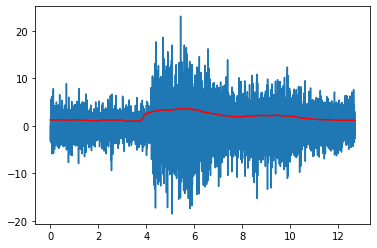

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

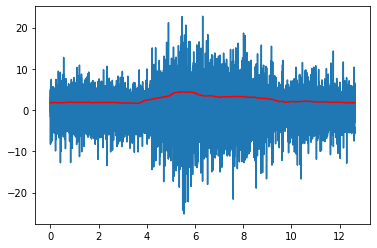

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

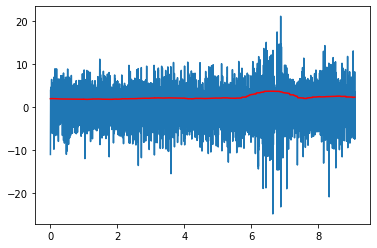

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

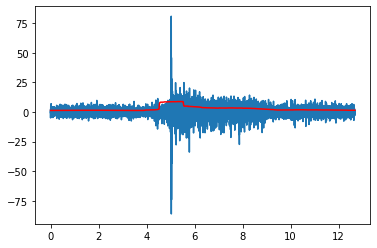

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

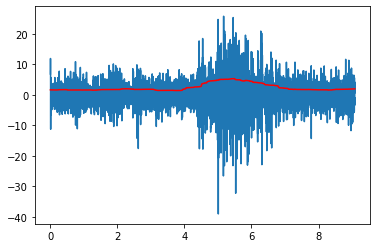

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

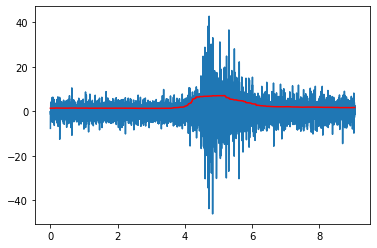

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

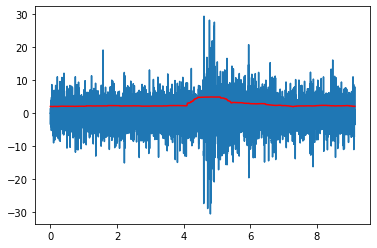

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

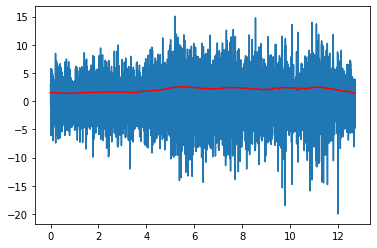

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

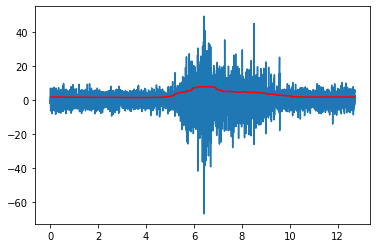

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

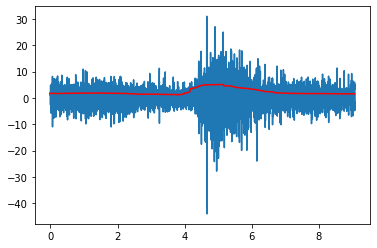

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

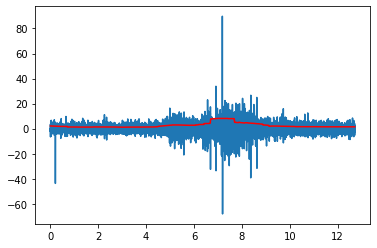

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

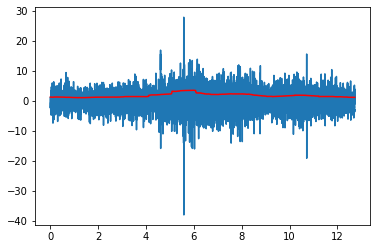

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

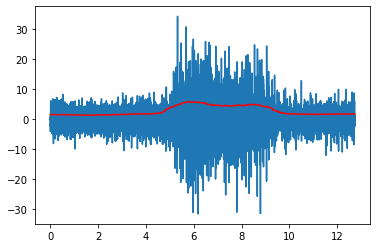

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

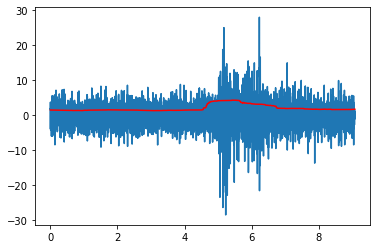

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

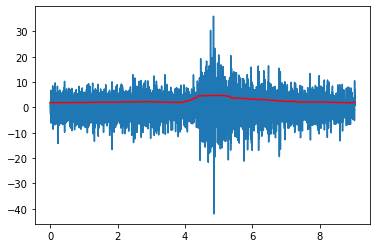

<IPython.core.display.Javascript object>

In [ ]:
#teste
ysd = plotar_grafico_emg_sd("MA1", selecionar(df_dict[1], movementx= "point"), dados01)

In [ ]:
def plotar_grafico_glove_sd(glove, query, dados) :
  glove_dict = dict()
  tb = widgets.TabBar([str(i) for i in range(len(query)) ])
  for j in range(len(query)):
    i = query.index[j]
    glovex = np.where(dados['/'+str(i) +'/channels_glove'][()] == glove )[0][0]
    w= dados['/'+str(i) +'/glove'][glovex].shape[0]
    t= 1/256
    x= np.arange(0,w,1)*(t)
    glove_dict[j] = dados['/'+str(i) +'/glove'][glovex]
    

    with tb.output_to(j, select=(j == 0)):

      pylab.plot(x, glove_dict[j])
      pylab.show()
  return glove_dict

subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

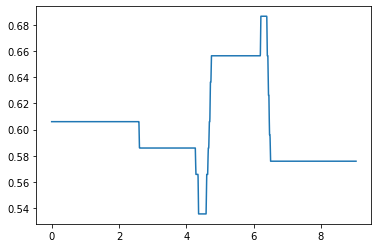

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

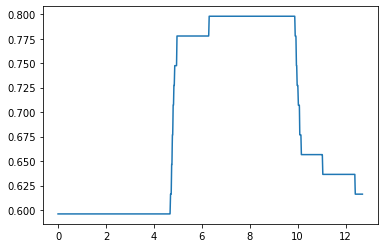

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

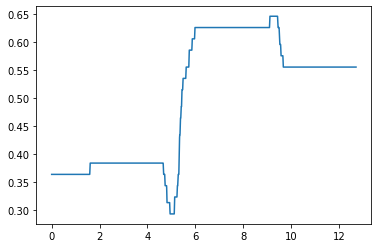

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

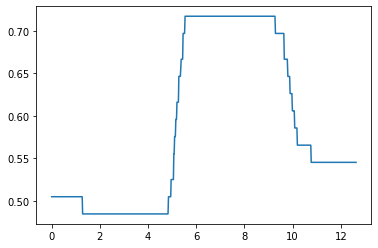

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

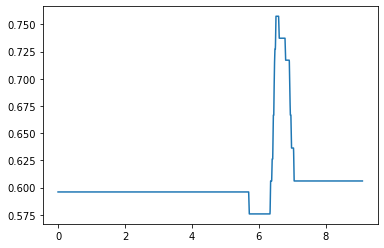

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

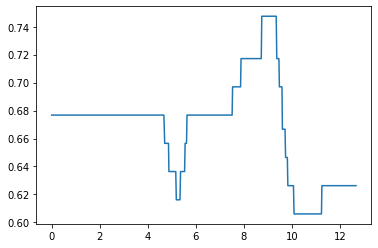

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

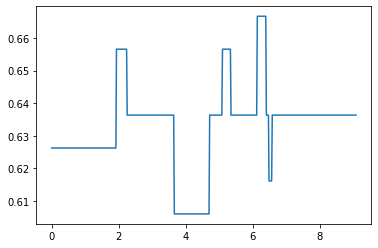

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

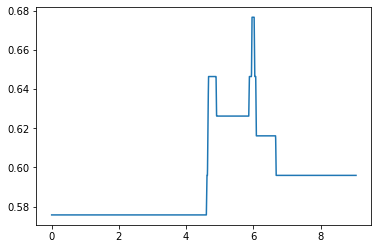

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

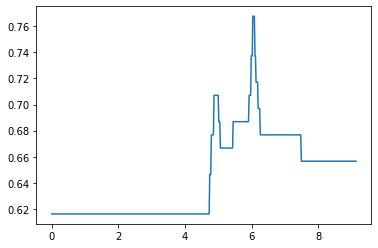

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

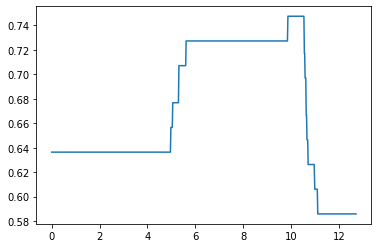

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

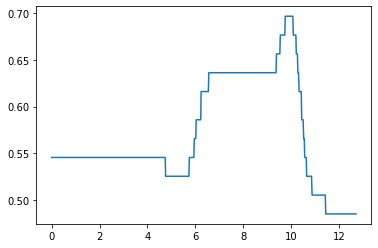

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

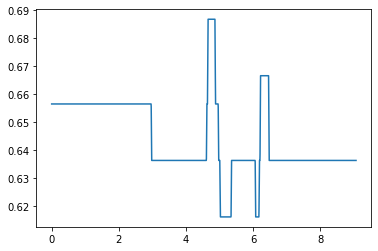

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

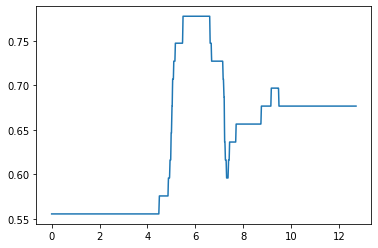

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

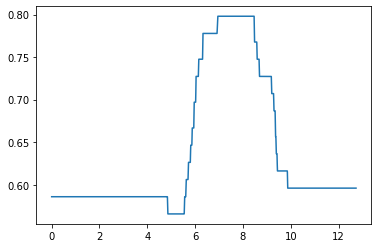

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

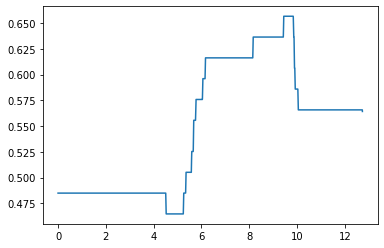

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

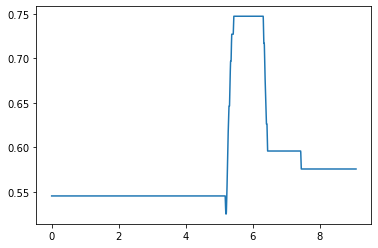

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

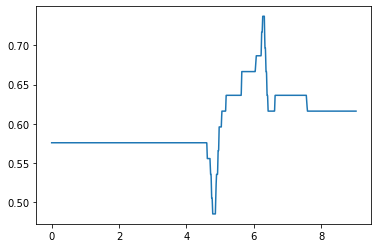

<IPython.core.display.Javascript object>

In [ ]:
glove_dict = plotar_grafico_glove_sd('Thumb_Roll     ',selecionar(df_dict[1], movementx= "point"), dados01)

subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

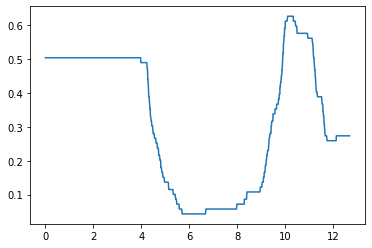

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

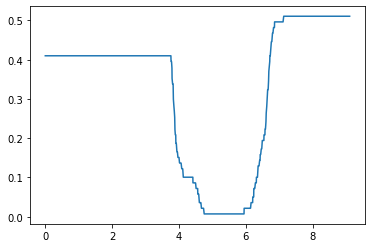

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

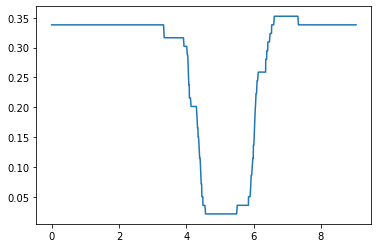

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

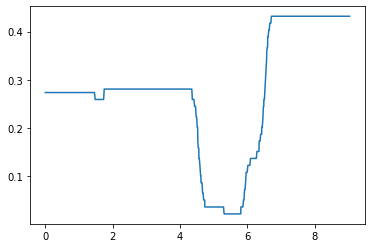

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

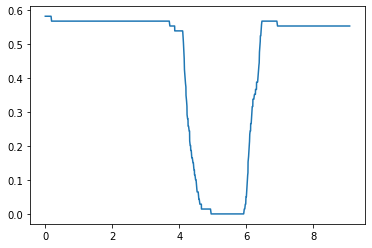

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

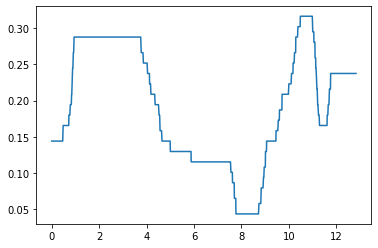

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

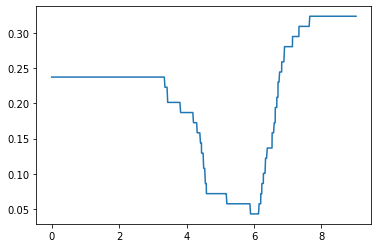

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

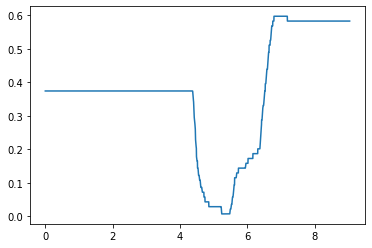

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

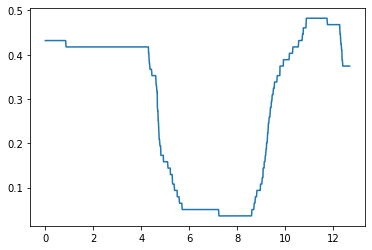

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

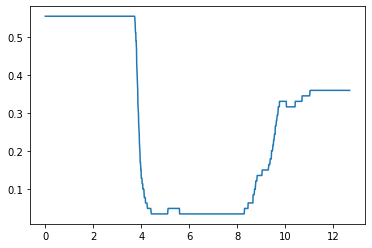

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

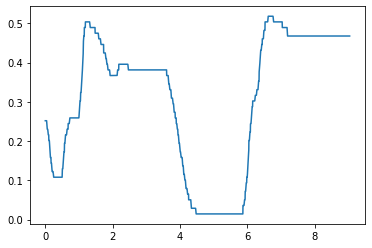

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

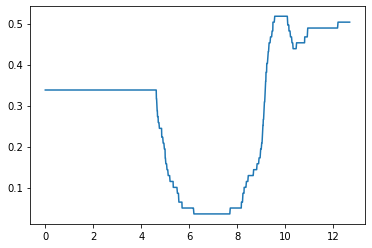

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

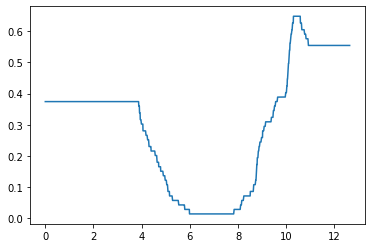

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

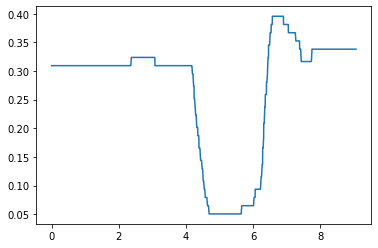

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

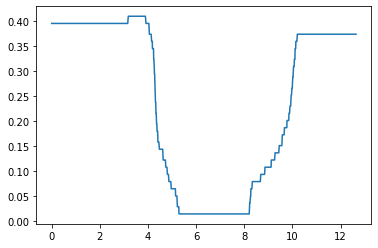

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

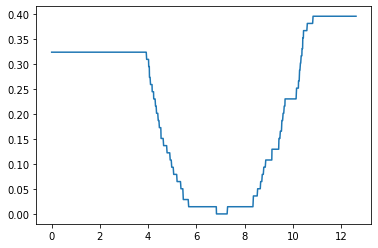

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

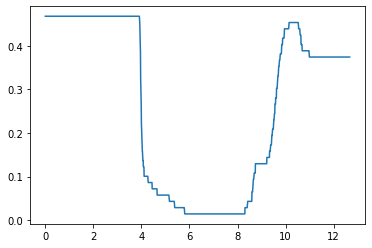

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

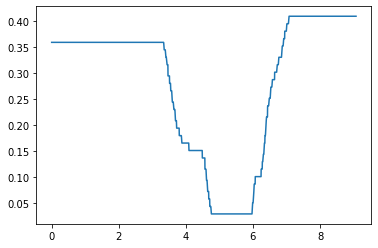

<IPython.core.display.Javascript object>

{0: array([0.50359714, 0.50359714, 0.50359714, ..., 0.2733813 , 0.2733813 ,
        0.2733813 ], dtype=float32),
 1: array([0.41007194, 0.41007194, 0.41007194, ..., 0.51079136, 0.51079136,
        0.51079136], dtype=float32),
 2: array([0.3381295, 0.3381295, 0.3381295, ..., 0.3381295, 0.3381295,
        0.3381295], dtype=float32),
 3: array([0.2733813 , 0.2733813 , 0.2733813 , ..., 0.43165466, 0.43165466,
        0.43165466], dtype=float32),
 4: array([0.5827338, 0.5827338, 0.5827338, ..., 0.5539568, 0.5539568,
        0.5539568], dtype=float32),
 5: array([0.1438849 , 0.1438849 , 0.1438849 , ..., 0.23741007, 0.23741007,
        0.23741007], dtype=float32),
 6: array([0.23741007, 0.23741007, 0.23741007, ..., 0.32374102, 0.32374102,
        0.32374102], dtype=float32),
 7: array([0.37410071, 0.37410071, 0.37410071, ..., 0.5827338 , 0.5827338 ,
        0.5827338 ], dtype=float32),
 8: array([0.43165466, 0.43165466, 0.43165466, ..., 0.37410071, 0.37410071,
        0.37410071], dtype=float

In [ ]:
plotar_grafico_glove_sd('Index_Middle   ',selecionar(df_dict[11], movementx= "point"), dados11)

In [ ]:
emg_sd_decimated = dict()
for i in range(len(ysd)) :
  emg_sd_decimated[i] = scipy.signal.decimate(ysd[i], 8, n=None , ftype='iir', axis=0, zero_phase=True)

In [ ]:
def plotar_grafico_emg_glove(glove_dict) :
  tb = widgets.TabBar([str(i) for i in range(len(glove_dict)) ])
  for j in range(len(glove_dict)):
    fs_glove = 256
    dt = 1/fs_glove
    t = np.arange(0, glove_dict[j].shape[0])*dt
   
  
    with tb.output_to(j, select=(j == 0)):

      plt.xlabel('tempo (s)')
      plt.plot(t, glove_dict[j])
      plt.plot(t, emg_sd_decimated[j])
      pylab.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

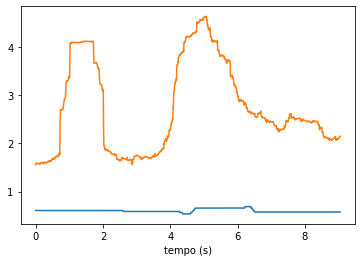

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

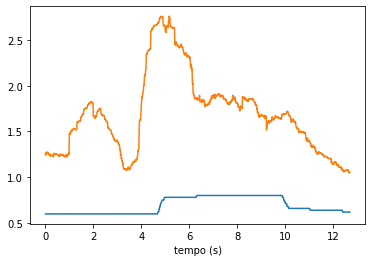

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

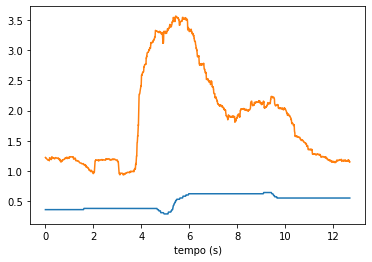

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

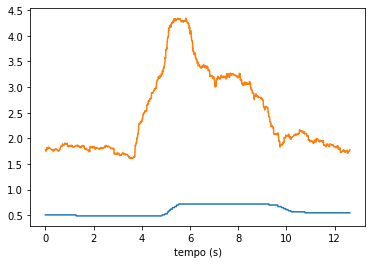

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

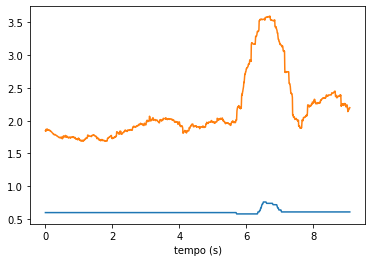

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

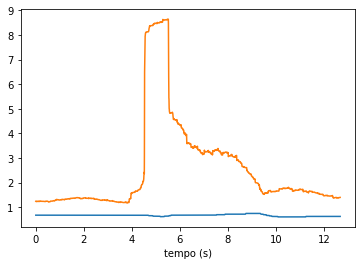

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

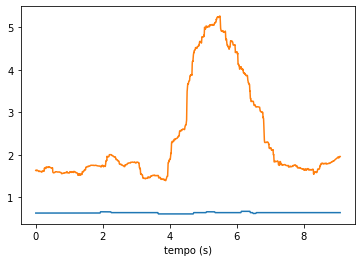

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

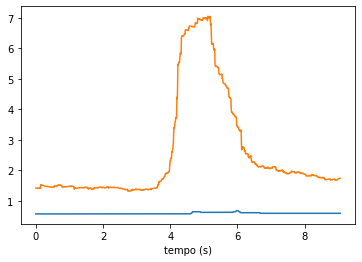

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

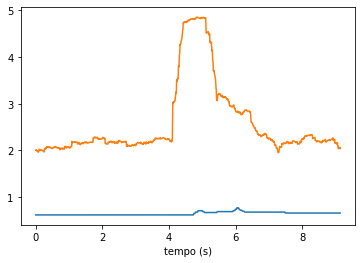

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

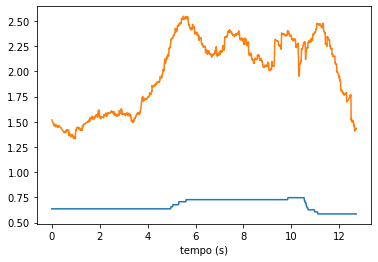

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

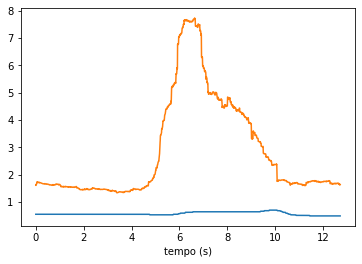

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

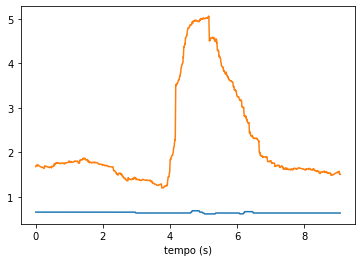

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

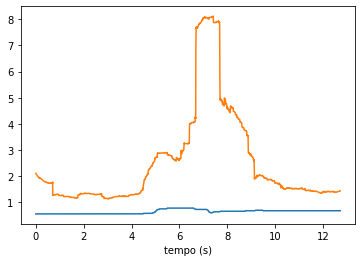

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

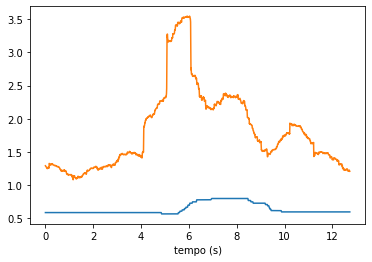

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

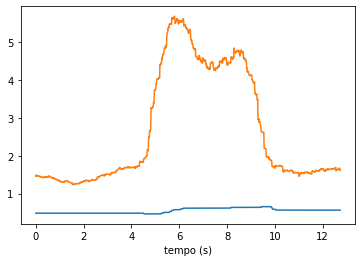

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

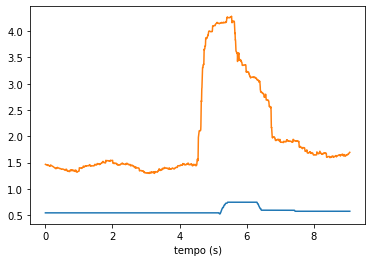

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

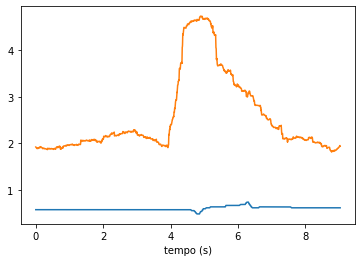

<IPython.core.display.Javascript object>

In [ ]:
plotar_grafico_emg_glove(glove_dict)

In [ ]:
def plotar_grafico_emg_glove_atraso(glove_dict, atraso) :
  tb = widgets.TabBar([str(i) for i in range(len(glove_dict)) ])
  for j in range(len(glove_dict)):
    fs_glove = 256
    dt = 1/fs_glove
    t = np.arange(0, glove_dict[j].shape[0])*dt
   
  
    with tb.output_to(j, select=(j == 0)):

      plt.xlabel('tempo (s)')
      plt.plot(t[atraso:], glove_dict[j][:-atraso])
      plt.plot(t[atraso:], emg_sd_decimated[j][atraso:])
      pylab.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

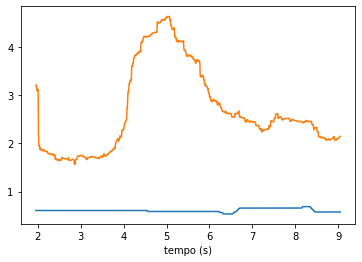

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

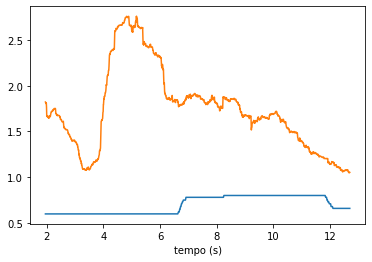

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

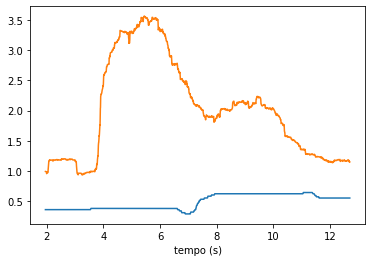

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

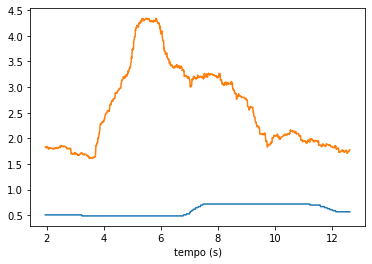

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

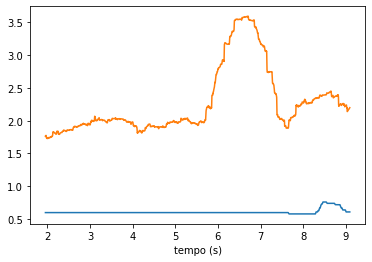

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

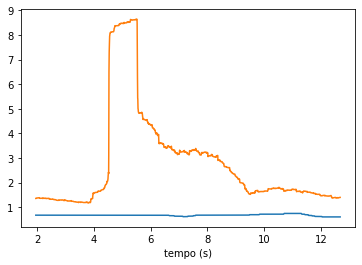

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

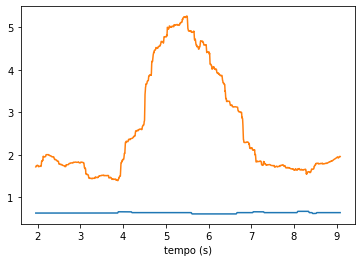

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

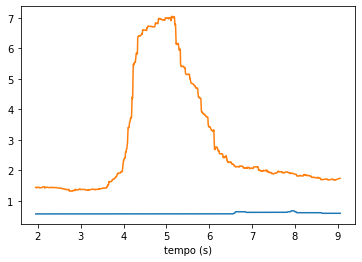

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

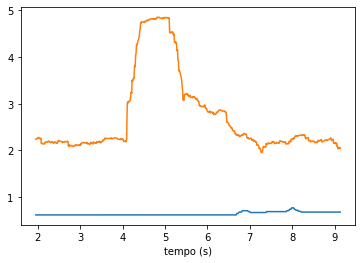

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

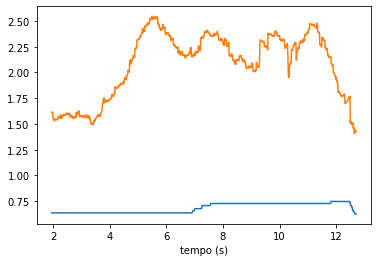

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

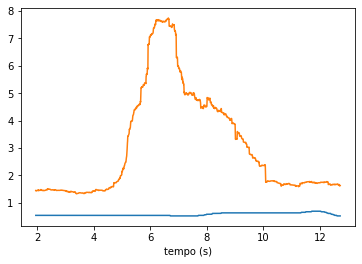

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

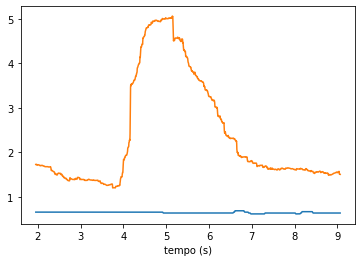

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

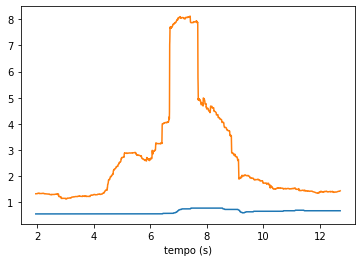

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

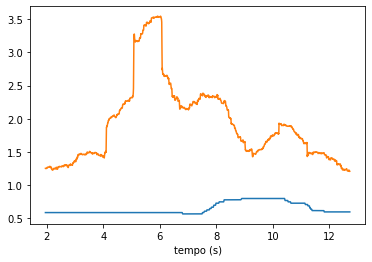

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

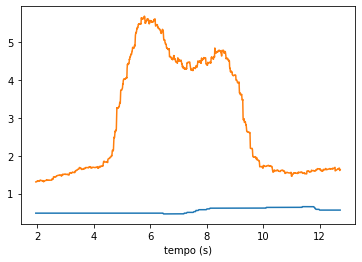

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

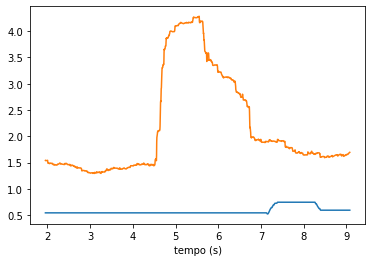

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

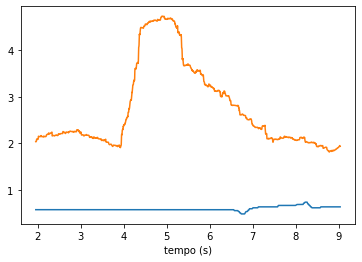

<IPython.core.display.Javascript object>

In [ ]:
plotar_grafico_emg_glove_atraso(glove_dict, 500)

In [ ]:
def crosscorr(x,y, alpha=0.05):
    '''
     Computes the normalized cross-correlation (formula 5.3 from Billings, SA (2013)) between the signals x and y.
     
     written by: Renato Naville Watanabe 
     
     [phi, lags, CB] = crosscorr(x,y, alpha)
     	
     
     Inputs:
       
       x and y: vector of np.float64s, column-vectors with the signals to compute the cross-correlation.
     
       alpha: np.float64, significance value of the confidence boundaries. Usually is used alpha = 0.05.
     
     
     Outputs:
     
       phi: vector of np.float64s, the normalized crosscorrelation.
     
       lags: vector of integers, vector with the corresponding lags of the phi vector.
     
       CB: vector of 2 np.float64 elements, confidence boundaries to consider that the cross-correlation at a given value is zero.
    '''
    import numpy as np
    from scipy.stats import norm
    
    x = np.reshape(x,(x.shape[0]))
    y = np.reshape(y,(y.shape[0]))
    xr = np.copy(x)
    yr = np.copy(y)
    np.random.shuffle(xr)
    np.random.shuffle(yr)
  
    c = np.correlate(x - np.mean(x), y - np.mean(y), mode='same')/len(x)
    phi = c/(np.std(x-np.mean(x))*np.std(y-np.mean(y)))
    cr = np.correlate(xr - np.mean(xr), yr - np.mean(yr), mode='same')/len(xr)
    phir = cr/(np.std(xr-np.mean(xr))*np.std(yr-np.mean(yr)))
    N = len(x)
    CB = np.array([-norm.ppf(alpha/2)/np.sqrt(N), norm.ppf(alpha/2,0,1)/np.sqrt(N)])
    # CB = np.array([-np.max(np.abs(phir)), np.max(np.abs(phir))])
    lags = np.arange(N)
    lags = lags - N//2
    return phi, lags

In [ ]:
fs_glove = 256
dt = 1/fs_glove
corr = dict()
lags = dict()
max_corr = np.zeros(len(glove_dict))
for i in range(len(glove_dict)):
    corr[i], lags[i] = crosscorr(glove_dict[i], emg_sd_decimated[i])
    corr[i] = corr[i][np.abs(lags[i]*dt)<=1]
    lags[i] = lags[i][np.abs(lags[i]*dt)<=1]
    max_corr[i] = lags[i][np.abs(corr[i]).argmax()]*dt

In [ ]:
max_corr

array([ 0.3671875 ,  0.859375  ,  0.5859375 ,  0.3828125 ,  0.42578125,
       -0.015625  ,  0.56640625,  0.2265625 ,  0.328125  ,  0.54296875,
       -0.0234375 ,  0.109375  ,  0.484375  ,  0.        ,  0.65625   ,
        0.234375  ,  0.20703125,  0.453125  ])

In [ ]:
max_corr.mean()

0.3550347222222222

In [ ]:
def plotar_grafico_corr(lags, corr) :
  tb = widgets.TabBar([str(i) for i in range(len(lags)) ])
  for j in range(len(lags)):  
    with tb.output_to(j, select=(j == 0)):
      plt.figure()
      plt.plot(lags[j]*dt, corr[j])
      plt.grid()
      plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

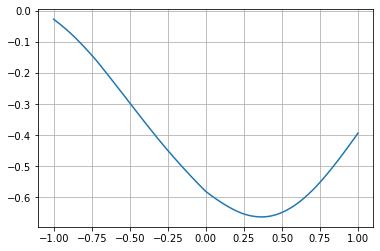

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

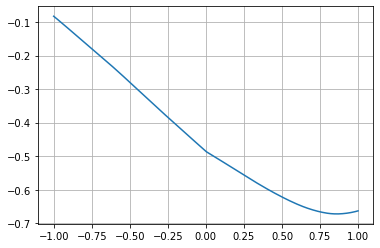

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

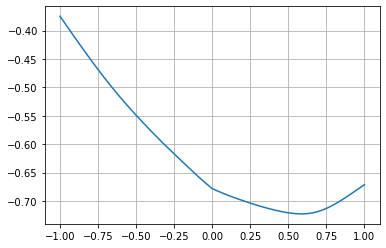

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

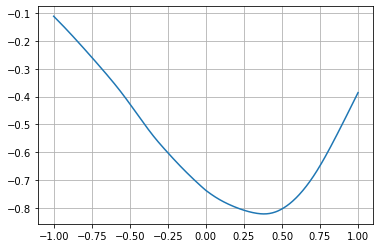

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

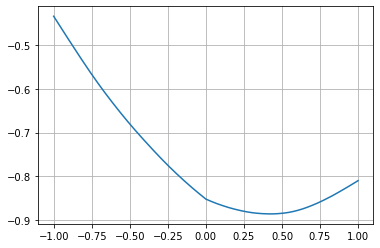

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

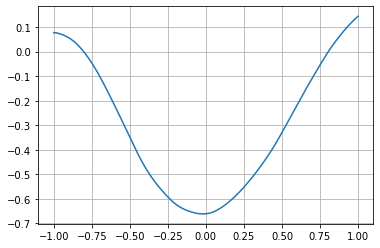

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

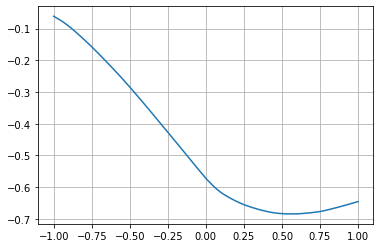

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

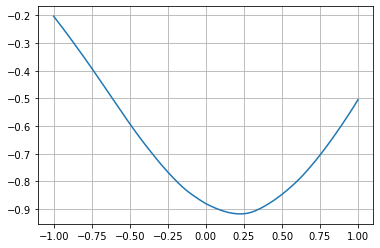

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

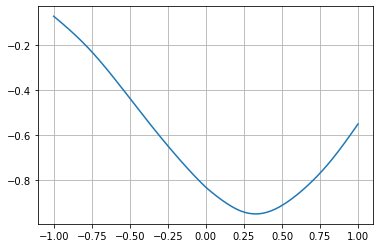

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

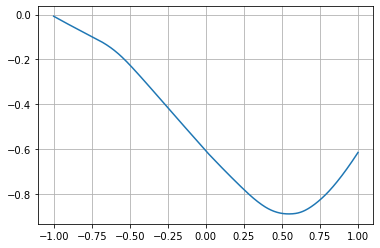

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

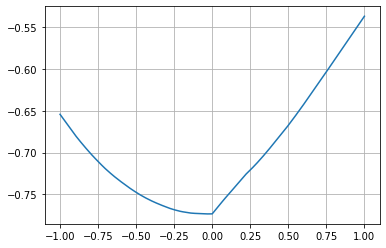

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

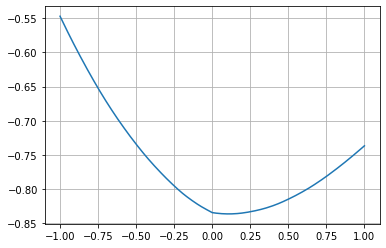

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

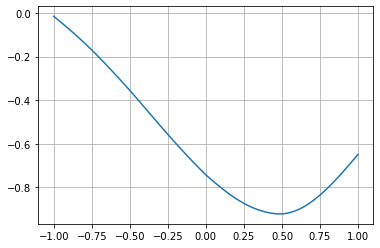

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

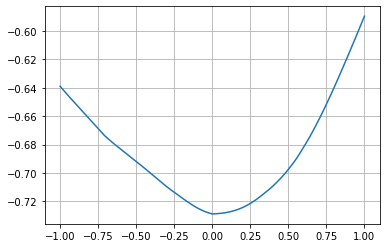

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

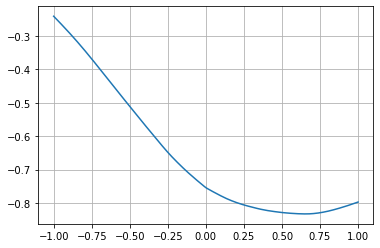

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

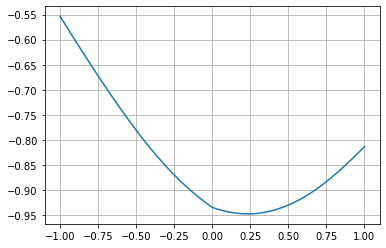

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

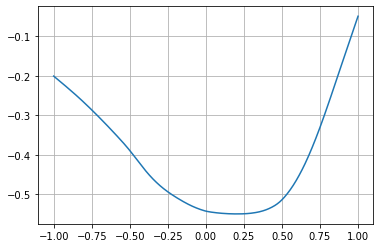

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

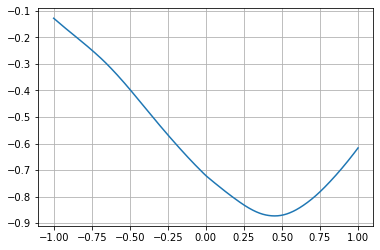

<IPython.core.display.Javascript object>

In [ ]:
plotar_grafico_corr(lags, corr)

In [ ]:
def correlacao(glove_dict, emg_sd_decimated) :
  correlacao_dict = dict()
  for i in range(len(glove_dict)) :
    X = pd.DataFrame(emg_sd_decimated[i])
    Y = pd.DataFrame(glove_dict[i])
    correlacao_dict[i]= X[0].corr(Y[0])
  return correlacao_dict

In [ ]:
correlacao_dict = correlacao(glove_dict, emg_sd_decimated) 
correlacao_dict

{0: -0.5812069960049521,
 1: -0.4858756380831309,
 2: -0.6783750672498379,
 3: -0.7372784033977259,
 4: -0.8519481230692229,
 5: -0.6607052088893097,
 6: -0.5727741293092997,
 7: -0.8805441937358753,
 8: -0.8317553359321118,
 9: -0.6080565302706918,
 10: -0.773220426899776,
 11: -0.8343946632252098,
 12: -0.742960072036424,
 13: -0.7288352434664971,
 14: -0.7541546030899654,
 15: -0.9339820466610163,
 16: -0.5426338789745024,
 17: -0.7209207624627587}

In [ ]:
def correlacao_atraso(glove_dict, emg_sd_decimated, atraso) :
  correlacao_dict_atraso = dict()
  for i in range(len(glove_dict)) :
    X = pd.DataFrame(emg_sd_decimated[i][:-atraso])
    Y = pd.DataFrame(glove_dict[i][atraso:])
    correlacao_dict_atraso[i] = X[0].corr(Y[0])
  return correlacao_dict_atraso

In [ ]:
correlacao_dict_atraso = correlacao_atraso(glove_dict, emg_sd_decimated, 10) 
correlacao_dict_atraso

{0: -0.5962185884843906,
 1: -0.49885136715709444,
 2: -0.6840645677793213,
 3: -0.753374952317322,
 4: -0.8602252239803346,
 5: -0.6553679017761767,
 6: -0.5924946830933677,
 7: -0.8913918877858558,
 8: -0.8548810476674606,
 9: -0.6367237026252516,
 10: -0.7685936424872463,
 11: -0.8377192877778741,
 12: -0.7682929313660445,
 13: -0.7305461715966663,
 14: -0.7660870021107045,
 15: -0.9393012335558515,
 16: -0.545448579644612,
 17: -0.7408459375748754}

In [ ]:
#glove_dict = plotar_grafico_glove_sd('Index_Middle',selecionar(df_dict, subjx= "subj01", movementx= "point"))
#emg_sd_decimated = dict()
#ysd = plotar_grafico_emg_sd("MA1", selecionar(df_dict, subjx= "subj01", movementx= "point"))
colunas= ['subj','movement','channels_emg', 'channels_glove','session','correlacao']
tabela_correlacao= pd.DataFrame(columns=colunas)

def correlacao_tabela(subj, movement, channels_emg, channels_glove) :
  glove_dict = plotar_grafico_glove_sd(channels_glove, selecionar(df_dict, subjx= subj, movementx= movement))
  ysd = plotar_grafico_emg_sd(channels_emg, selecionar(df_dict, subjx= subj, movementx= movement))
  emg_sd_decimated = dict()
  for i in range(len(ysd)) :
    emg_sd_decimated[i] = scipy.signal.decimate(ysd[i], 8, n=None , ftype='iir', axis=0, zero_phase=True)

  fs_glove = 256
  dt = 1/fs_glove
  corr = dict()
  lags = dict()
  max_corr = np.zeros(len(glove_dict))
  for i in range(len(glove_dict)):
    corr[i], lags[i] = crosscorr(glove_dict[i], emg_sd_decimated[i])
    corr[i] = corr[i][np.abs(lags[i]*dt)<=1]
    lags[i] = lags[i][np.abs(lags[i]*dt)<=1]
    max_corr[i] = lags[i][np.abs(corr[i]).argmax()]*dt
  
  for i in range(len(max_corr)) :
    tabela_correlacao['subj'] = subj
    tabela_correlacao['movement'] = movement
    tabela_correlacao['channels_emg']= channels_emg
    tabela_correlacao['channels_glove']= channels_glove
    tabela_correlacao['correlacao'] = max_corr[i]

In [ ]:
dados[1]

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 20 08:55:53 2020',
 '__version__': '1.0',
 'channels_emg': array(['MA1 ', 'MA2 ', 'MA3 ', 'MA4 ', 'MA5 ', 'MA6 ', 'MA7 ', 'MA8 ',
        'MA9 ', 'MB1 ', 'MB2 ', 'MB3 ', 'MB4 ', 'MB5 ', 'MB6 ', 'MB7 ',
        'MB8 ', 'MB9 ', 'MC1 ', 'MC2 ', 'MC3 ', 'MC4 ', 'MC5 ', 'MC6 ',
        'MC7 ', 'MC8 ', 'MC9 ', 'MD1 ', 'MD2 ', 'MD3 ', 'MD4 ', 'MD5 ',
        'MD6 ', 'MD7 ', 'MD8 ', 'MD9 ', 'ME1 ', 'ME2 ', 'ME3 ', 'ME4 ',
        'ME5 ', 'ME6 ', 'ME7 ', 'ME8 ', 'ME9 ', 'MF1 ', 'MF2 ', 'MF3 ',
        'MF4 ', 'MF5 ', 'MF6 ', 'MF7 ', 'MF8 ', 'MF9 ', 'MG1 ', 'MG2 ',
        'MG3 ', 'MG4 ', 'MG5 ', 'MG6 ', 'MG7 ', 'MG8 ', 'MG9 ', 'MH1 ',
        'MH2 ', 'MH3 ', 'MH4 ', 'MH5 ', 'MH6 ', 'MH7 ', 'MH8 ', 'MH9 ',
        'MI1 ', 'MI2 ', 'MI3 ', 'MI4 ', 'MI5 ', 'MI6 ', 'MI7 ', 'MI8 ',
        'MI9 ', 'MJ1 ', 'MJ2 ', 'MJ3 ', 'MJ4 ', 'MJ5 ', 'MJ6 ', 'MJ7 ',
        'MJ8 ', 'MJ9 ', 'MK1 ', 'MK2 ', 'MK3 ', 'MK4 ', 